Spam SMS Classification
Domain
SMS, Text Data

Business Context
The SMS spam is a growing problem considering availability of cheap sms packages offered by various telecom service companies. SMS spam filtering is a relatively new task which inherits many issues and solutions from email spam filtering. The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according to ham (legitimate) or spam.

Objective
Given a text message and label whether a sms is a spam message, can you train a model using navie bayes  that allows you to correctly predict a new sms as spam or ham.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
train=pd.read_csv('sms_spam_data.csv',encoding='latin-1')

In [17]:
train.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
train.drop('Unnamed: 2',axis=1,inplace=True)
train.drop('Unnamed: 3',axis=1,inplace=True)
train.drop('Unnamed: 4',axis=1,inplace=True)

In [19]:
train.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Let us replace the Ham(Not spam)-0 and spam with 1 using replace function 



In [23]:
train['v1']=train['v1'].replace('ham',0)
train['v1']=train['v1'].replace('spam',1)

In [24]:
train.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
old_col_name='v1'
new_col_name='label'
train.rename(columns={old_col_name:new_col_name}, inplace=True)

In [28]:
old_col_name1='v2'
new_col_name1='sms'
train.rename(columns={old_col_name1:new_col_name1}, inplace=True)

In [54]:
train.shape

(5572, 2)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   sms     5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


checking frequency count of both the classes 



In [34]:
pd.value_counts(train['label'])

C:\Users\abhis\AppData\Local\Temp\ipykernel_25136\3020040458.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train['label'])


label
0    4825
1     747
Name: count, dtype: int64

there are 4825 Not spam messages and 747 spam messages, classes are not distributed equally  

C:\Users\abhis\AppData\Local\Temp\ipykernel_25136\1881084449.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train['label']).plot(kind='bar')


<Axes: xlabel='label'>

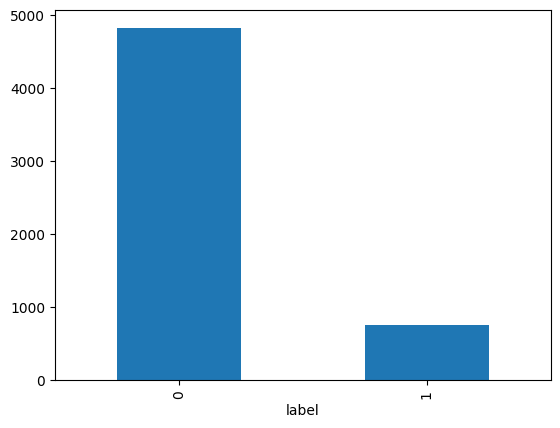

In [41]:
pd.value_counts(train['label']).plot(kind='bar')

C:\Users\abhis\AppData\Local\Temp\ipykernel_25136\1542238043.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train['label']).plot(kind='pie',autopct='%1.0f%%')


Text(0.5, 1.0, 'pie chart')

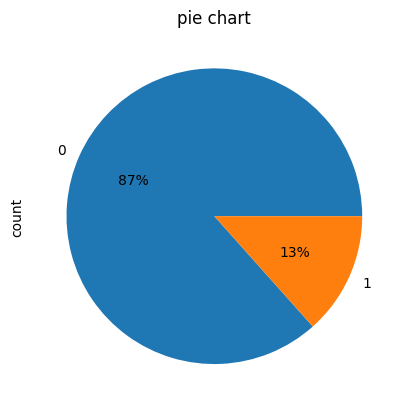

In [47]:
pd.value_counts(train['label']).plot(kind='pie',autopct='%1.0f%%')
plt.title('pie chart')

By observation we can notice that there are stopwords, htmltags, special characters. We should pre-process the text now 

In [49]:
from bs4 import BeautifulSoup
import re 
from nltk.corpus import stopwords

In [50]:
def pre_processing(raw_text):
    soup=BeautifulSoup(raw_text,'html.parser')   #removing html tags if any 
    text1=soup.get_text()
    #removal of sepcial charcater if any 
    text2=re.sub('[^a-zA-Z]',' ',text1)
    #converting the above words into 
    text3=text2.lower().split()
    stops=set(stopwords.words('english'))
    clean_text=[w for w in text3 if not w in stops]
    return(" ".join(clean_text))

In [57]:
clean_text=list()
num=len(train['sms'])
print(num)

for i in range(0,num):
    clean_text.append(pre_processing(train.sms[i]))

5572


C:\Users\abhis\AppData\Local\Temp\ipykernel_25136\490495892.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(raw_text,'html.parser')   #removing html tags if any


In [56]:
train.sms[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [60]:
cdf=pd.DataFrame(data={'label': train['label'],'sms':clean_text})

In [61]:
cdf.head()

,label,sms
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think goes usf lives around though


BUILDING THE MODEL TO PREDICT HAM OR SPAM

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X=cdf['sms']
y=cdf['label']

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [73]:
from sklearn.feature_extraction.text  import CountVectorizer

vectorizer=CountVectorizer()
vector=vectorizer.fit_transform(x_train)
vector_n=vector.toarray()
vector_n

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [76]:
nb.fit(vector,y_train)

MultinomialNB()

In [77]:
x_test_tran=vectorizer.transform(x_test)

In [78]:
y_predict=nb.predict(x_test_tran)

In [79]:
from sklearn import metrics 

metrics.accuracy_score(y_test,y_predict)

0.9863603732950467

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[1196,   10],
       [   9,  178]], dtype=int64)

Conclusion and Interpretation







With Naviebayes we are able to get accuracy of 98 %, to predict the given text is ham or spam  